## Import

In [5]:
#https://peopledoc.github.io/workalendar/basic.html
from datetime import date
from datetime import timedelta
from datetime import datetime
from calendar import monthrange
from calendra.europe import Sweden
import pandas as pd 

data = pd.read_csv("input_py.csv",sep=';')
data = data.fillna(0)
data['date_'] = data.apply(lambda x: datetime.strptime(x['date'], '%Y-%m-%d'), axis=1)
data = data.set_index('date_')


In [43]:


def calc_salary_julia(month_df):
	from calendar import monthrange
	from datetime import date
	from datetime import datetime
	# julia
	month = month_df.head(1).index.month[0]
	year = month_df.head(1).index.year[0]
	num_days_in_month = monthrange(year,month)[1]
	julia_salary_monthly = 31800
	sgi_year = 31800*12
	julia_p_kr_per_day = ((sgi_year*0.8*0.97))/365
	julia_pwc_bonus_kr_per_day = ((sgi_year*0.2*0.5))/365
	vacation_bonus_kr_per_day = (julia_salary_monthly*0.0043)
	
	## variables
	num_vacation_days = sum(month_df['vacation_j']*month_df['workday'])
	all_parent_days_j = month_df[['work_bonus_day_j','parent_day_j']].max(axis=1)
	num_total_parent_days = sum(all_parent_days_j.multiply(month_df['multi_j']))
	num_work_bonus_days = sum(month_df['work_bonus_day_j'])
	num_p_julia = sum(month_df['parent_day_j'])
	
	# decide removal of salary
	if (sum(all_parent_days_j)==num_days_in_month):
		remove_from_salary_julia = julia_salary_monthly
	else:
		remove_from_salary_julia = ((31800*12)/365)*sum(all_parent_days_j)
	#decide money from FK
	salary_from_work = julia_salary_monthly - remove_from_salary_julia
	from_fk_julia = julia_p_kr_per_day*num_total_parent_days
	from_pwc_bonus = num_work_bonus_days*julia_pwc_bonus_kr_per_day
	from_vacation_bonus = num_vacation_days*vacation_bonus_kr_per_day
	total_salary = from_fk_julia +from_pwc_bonus+ salary_from_work + from_vacation_bonus
	output = {}
	output['total_salary'] = total_salary
	output['month'] = date(year,month,1)
	output['num_vacation_days'] = num_vacation_days
	output['num_total_parent_days'] = num_total_parent_days
	output['num_work_bonus_days'] = num_work_bonus_days
	output['salary_from_work'] = salary_from_work
	return output

def calc_salary_filip(month_df):
	from calendar import monthrange
	from datetime import date
	from datetime import datetime
	# filip
	month = month_df.head(1).index.month[0]
	year = month_df.head(1).index.year[0]
	num_days_in_month = monthrange(year,month)[1]
	filip_salary_monthly = 42000
	bb_10 = 46500*10
	salary_over_10bb_yearly = (filip_salary_monthly*12)-bb_10
	salary_below_10bb_yearly = filip_salary_monthly*12 - salary_over_10bb_yearly
	filip_klarna_bonus_kr_per_day = ((salary_below_10bb_yearly*0.2)+ (salary_over_10bb_yearly))/365
	filip_p_kr_per_day = ((salary_below_10bb_yearly*0.8*0.97))/365
	vacation_bonus_kr_per_day = (filip_salary_monthly*0.0043)
	## variables
	num_vacation_days = sum(month_df['vacation_f']*month_df['workday'])
	all_parent_days_filip = month_df[['work_bonus_day_f','parent_day_f','10d_f']].max(axis=1)
	num_total_parent_days = sum(all_parent_days_filip.multiply(month_df['multi_f']))
	num_work_bonus_days = sum(month_df['work_bonus_day_f'])
	#num_p_filip = sum(month_df[['parent_day_f','10d_f']].max(axis=1))
	# decide removal of salary
	remove_from_salary_filip=0
	if (sum(all_parent_days_filip)==num_days_in_month):
		remove_from_salary_filip = filip_salary_monthly
	else:
		remove_from_salary_filip = ((filip_salary_monthly*12)/365)*sum(all_parent_days_filip)

	salary_from_work = filip_salary_monthly - remove_from_salary_filip
	from_fk_filip = filip_p_kr_per_day*num_total_parent_days
	from_klarna_bonus = num_work_bonus_days*filip_klarna_bonus_kr_per_day
	from_vacation_bonus = num_vacation_days*vacation_bonus_kr_per_day
	total_salary = from_fk_filip + from_klarna_bonus + salary_from_work + num_vacation_days*vacation_bonus_kr_per_day	
	## store output
	output = {}
	output['total_salary'] = total_salary
	output['month'] = date(year,month,1)
	output['num_vacation_days'] = num_vacation_days
	output['num_total_parent_days'] = num_total_parent_days
	output['num_work_bonus_days'] = num_work_bonus_days
	output['salary_from_work'] = salary_from_work
	return output


In [44]:
# Set up list with every month that needs to be calculated
startyear = 2019
startmonth = 5
endyear = 2021
endmonth = 1
all_months = [date(m//12, m%12+1, 1) for m in range(startyear*12+startmonth-1, endyear*12+endmonth)]


In [45]:
list_of_output = []
for i in all_months:
    month_df = data[(data.index.year==i.year)&(data.index.month==i.month)]
    filip_output = calc_salary_filip(month_df)
    filip_output['name'] = 'filip'
    julia_output = calc_salary_julia(month_df)
    julia_output['name'] = 'julia'
    list_of_output.append(filip_output)
    list_of_output.append(julia_output)


In [46]:
pd_output = pd.DataFrame(list_of_output)
pd_output.to_csv('out.csv',index=False)

In [54]:
output_filip['month']

0     2019-05-01
2     2019-06-01
4     2019-07-01
6     2019-08-01
8     2019-09-01
10    2019-10-01
12    2019-11-01
14    2019-12-01
16    2020-01-01
18    2020-02-01
20    2020-03-01
22    2020-04-01
24    2020-05-01
26    2020-06-01
28    2020-07-01
30    2020-08-01
32    2020-09-01
34    2020-10-01
36    2020-11-01
38    2020-12-01
40    2021-01-01
Name: month, dtype: object

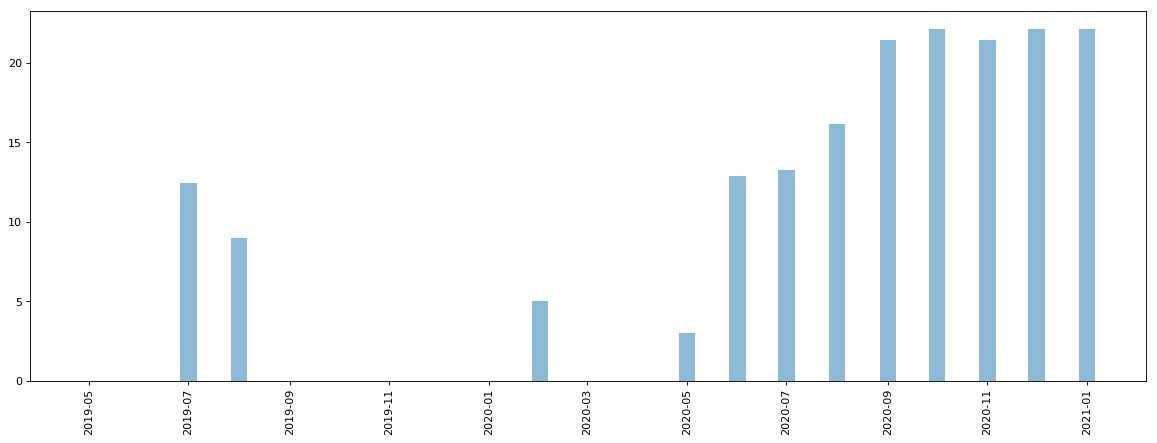

In [58]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')

output_filip['num_total_parent_days']
output_filip['month']

plt.bar(output_filip['month'],output_filip['num_total_parent_days'] ,width=10,align='center', alpha=0.5)
plt.xticks(rotation=90)

plt.show()

In [25]:
output_filip = pd_output[pd_output['name'] == 'filip']
tot_vacation_days = output_filip['num_vacation_days'].sum()
tot_parent_days = output_filip['num_total_parent_days'].sum()


In [27]:
plt.plot(output_filip['month'])

NameError: name 'plt' is not defined